In [1]:
import os
import gc
import sys
import glob
import numpy as np
import pandas as pd
import netCDF4 as nc
from datetime import datetime, timedelta
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
# To use PLUMBER2_GPP_common_utils, change directory to where it exists
os.chdir('/g/data/w97/mm3972/scripts/Land_Drought_Rainfall')
from common_utils import *

## Gamma distribution

In [21]:
# file_spi_30 = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/calc_AUS_SPI/nc_files/spi_gamma_30_reorder.nc'

file_spi_30         = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_gamma_30_reorder.nc'
file_spi_30_nanfill = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_gamma_30_reorder_nan_filled.nc' 
file_spi_90         = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_gamma_90_reorder.nc'
file_mask           = '/g/data/w97/mm3972/model/cable/src/CABLE-AUX/offline/mmy_gridinfo_AU/gridinfo_AWAP_CSIRO_AU_NAT_ELEV_DLCM_mask.nc'
file_rain           = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/agcd_v1_precip_total_r005_daily_1950_2023.nc'


In [22]:
# Read SPI
file_in    = file_spi_30
var_name   = 'spi_gamma_30'
ts_s       = 29

f_spi      = nc.Dataset(file_in, 'r')
spi        = f_spi.variables[var_name][:,10:,:-45].data #
lat_spi    = f_spi.variables['lat'][10:]
lon_spi    = f_spi.variables['lon'][:-45]

In [23]:
# Read mask
f_mask     = nc.Dataset(file_mask, 'r')
landsea    = f_mask.variables['landsea'][:]
lat_mask   = f_mask.variables['latitude'][:]
lon_mask   = f_mask.variables['longitude'][:]

ntime      = len(spi[:,0,0])

29   5775


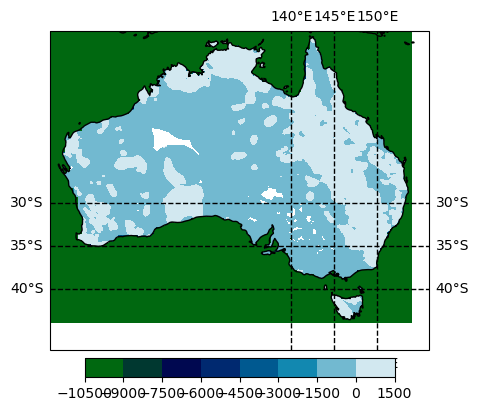

30   4859


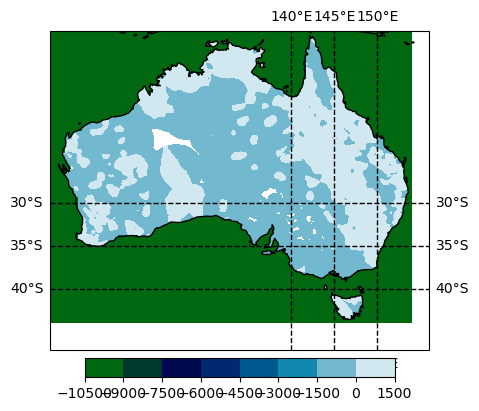

31   3000


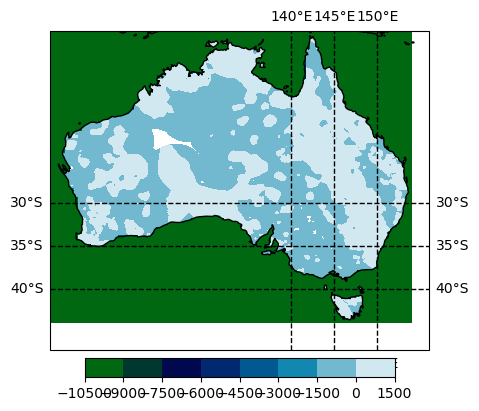

32   2700


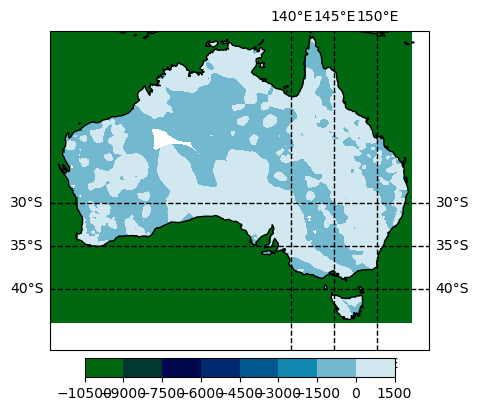

33   2462


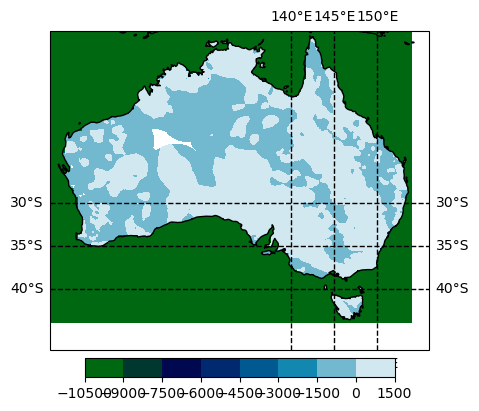

34   2506


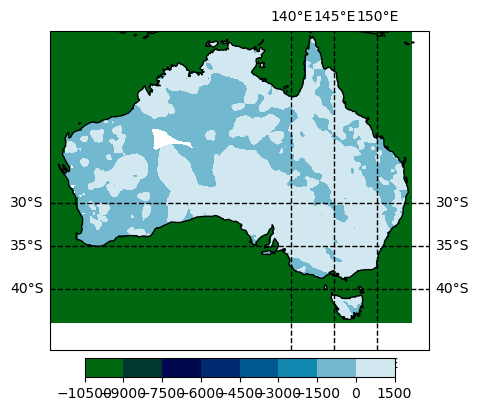

35   2279


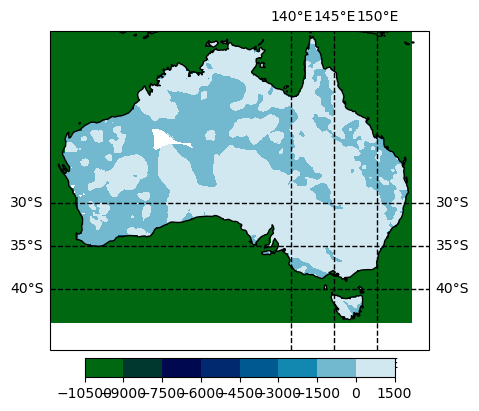

36   2279


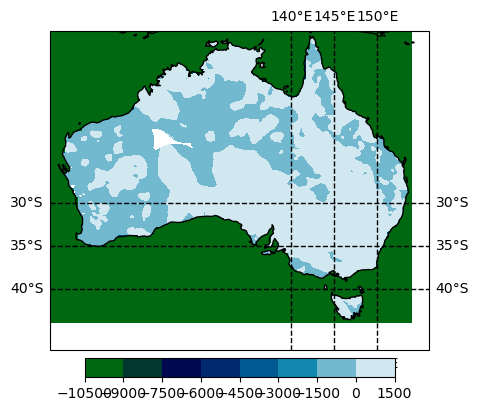

37   2279


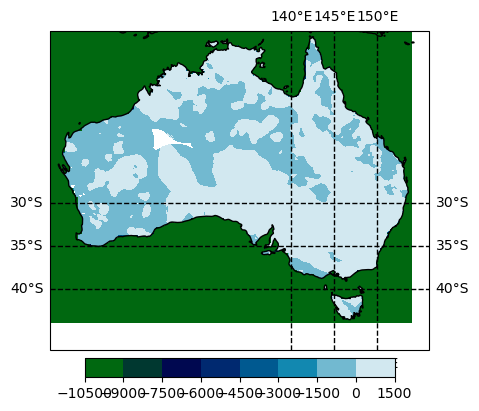

38   2297


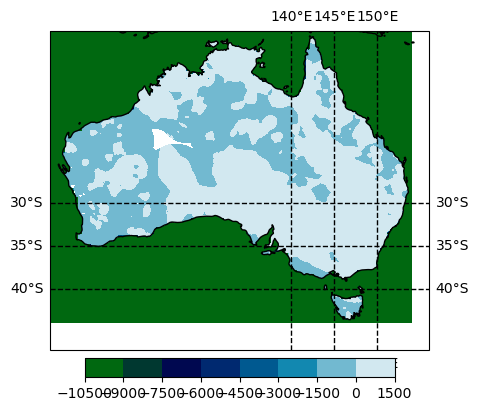

39   2274


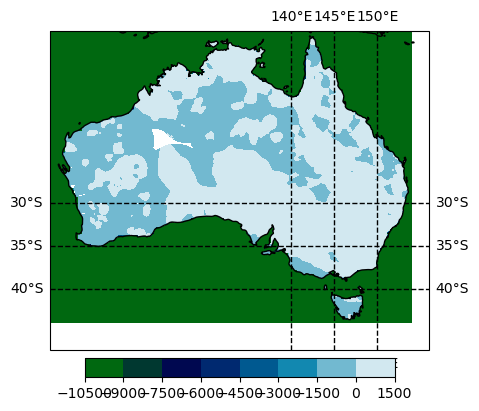

In [24]:
for i in np.arange(ts_s, 40):

    spi_tmp  = np.where(landsea == 1, -9999., spi[i,:,:].data)

    #spi_tmp  = spi[i,:,:].data

    if np.sum(np.isnan(spi_tmp)) > 100:
        print(i,' ', np.sum(np.isnan(spi_tmp)))

        # Create a figure with 3 subplots in 1 row
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), subplot_kw={'projection': ccrs.PlateCarree()})

        # Adjust spacing between subplots
        plt.subplots_adjust(wspace=0.3)

        # Set extent based on loc_lat and loc_lon
        ax.set_extent([112, 156, -45, -10])  # Example extent, adjust as needed

        ax.coastlines(resolution="50m", linewidth=1)

        # Add gridlines
        gl               = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
        gl.xlabels_top   = False
        gl.ylabels_right = False
        gl.xlines        = True

        gl.xlocator      = mticker.FixedLocator([140, 145, 150])
        gl.ylocator      = mticker.FixedLocator([-40, -35, -30])

        gl.xformatter    = LongitudeFormatter()
        gl.yformatter    = LatitudeFormatter()
        gl.xlabel_style  = {'size': 10, 'color': 'black'}
        gl.ylabel_style  = {'size': 10, 'color': 'black'}

        # clevs            = [-5,-4,-3,-2,-1,-0.5,0.5,1,2,3,4,5]
        plot1            = ax.contourf(lon_mask, lat_mask, spi_tmp,  transform=ccrs.PlateCarree(), cmap=plt.cm.ocean) # extend='both', levels=clevs,

        cb = plt.colorbar(plot1, ax=ax, orientation="horizontal", pad=0.02, aspect=16, shrink=0.8)
        cb.ax.tick_params(labelsize=10)

        plt.show()
        # plt.savefig('./plots/spatial_map_obs_'+message+'.png',dpi=300)


Gamma distribution: If there are extended periods of zero precipitation in the dataset, the SPI calculation might fail. The gamma distribution, which is used in the SPI calculation, cannot handle zero precipitation values effectively.

## Pearson distribution

In [5]:
file_spi_30         = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_30_reorder.nc'
file_spi_30_nanfill = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_30_reorder_nan_filled.nc' 
file_spi_90         = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_90_reorder.nc'
file_mask           = '/g/data/w97/mm3972/model/cable/src/CABLE-AUX/offline/mmy_gridinfo_AU/gridinfo_AWAP_CSIRO_AU_NAT_ELEV_DLCM_mask.nc'
file_rain           = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/agcd_v1_precip_total_r005_daily_1950_2023.nc'

In [7]:
# Read SPI
file_in    = file_spi_30_nanfill
var_name   = 'spi_pearson_30'
ts_s       = 29

f_spi      = nc.Dataset(file_in, 'r')
spi        = f_spi.variables[var_name][:].data #[:,10:,:-45]

/jobfs/127865378.gadi-pbs/ipykernel_1266813/1614902049.py:7: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  spi        = f_spi.variables[var_name][:].data #[:,10:,:-45]
/jobfs/127865378.gadi-pbs/ipykernel_1266813/1614902049.py:7: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  spi        = f_spi.variables[var_name][:].data #[:,10:,:-45]


In [8]:
lat_spi    = f_spi.variables['lat'][:] #[10:]
lon_spi    = f_spi.variables['lon'][:] #[:-45]
print(lat_spi)
print(lon_spi)

[-44.   -43.95 -43.9  -43.85 -43.8  -43.75 -43.7  -43.65 -43.6  -43.55
 -43.5  -43.45 -43.4  -43.35 -43.3  -43.25 -43.2  -43.15 -43.1  -43.05
 -43.   -42.95 -42.9  -42.85 -42.8  -42.75 -42.7  -42.65 -42.6  -42.55
 -42.5  -42.45 -42.4  -42.35 -42.3  -42.25 -42.2  -42.15 -42.1  -42.05
 -42.   -41.95 -41.9  -41.85 -41.8  -41.75 -41.7  -41.65 -41.6  -41.55
 -41.5  -41.45 -41.4  -41.35 -41.3  -41.25 -41.2  -41.15 -41.1  -41.05
 -41.   -40.95 -40.9  -40.85 -40.8  -40.75 -40.7  -40.65 -40.6  -40.55
 -40.5  -40.45 -40.4  -40.35 -40.3  -40.25 -40.2  -40.15 -40.1  -40.05
 -40.   -39.95 -39.9  -39.85 -39.8  -39.75 -39.7  -39.65 -39.6  -39.55
 -39.5  -39.45 -39.4  -39.35 -39.3  -39.25 -39.2  -39.15 -39.1  -39.05
 -39.   -38.95 -38.9  -38.85 -38.8  -38.75 -38.7  -38.65 -38.6  -38.55
 -38.5  -38.45 -38.4  -38.35 -38.3  -38.25 -38.2  -38.15 -38.1  -38.05
 -38.   -37.95 -37.9  -37.85 -37.8  -37.75 -37.7  -37.65 -37.6  -37.55
 -37.5  -37.45 -37.4  -37.35 -37.3  -37.25 -37.2  -37.15 -37.1  -37.05
 -37. 

In [9]:
# Read mask
f_mask     = nc.Dataset(file_mask, 'r')
landsea    = f_mask.variables['landsea'][:]
lat_mask   = f_mask.variables['latitude'][:]
lon_mask   = f_mask.variables['longitude'][:]

ntime      = len(spi[:,0,0])

In [12]:
np.unique(spi[30,:,:])

array([-9.9990000e+03, -3.0899999e+00, -3.0758612e+00, ...,
        2.3583052e+00,  2.3666801e+00,  2.3670397e+00], dtype=float32)

29   0


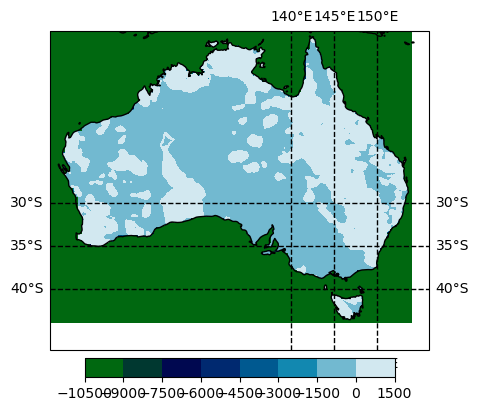

30   0


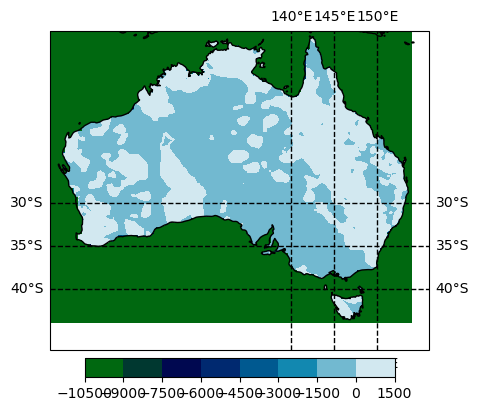

31   0


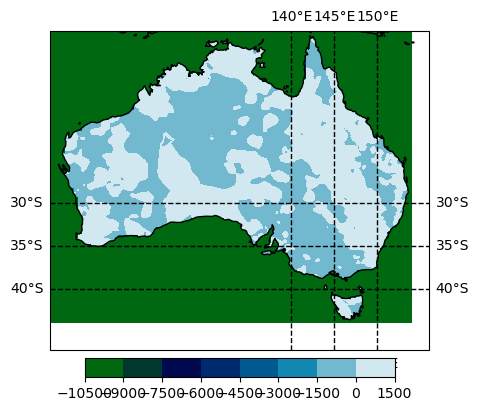

32   0


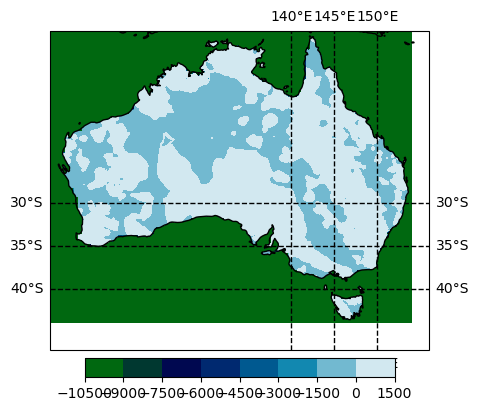

33   0


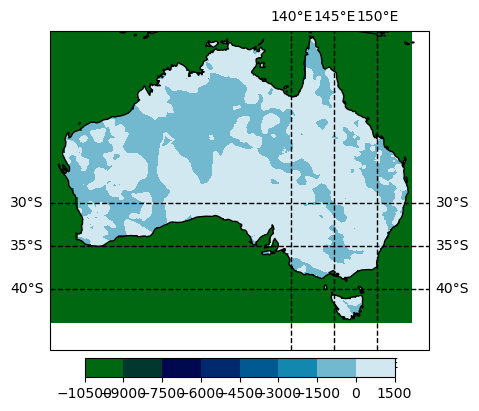

34   0


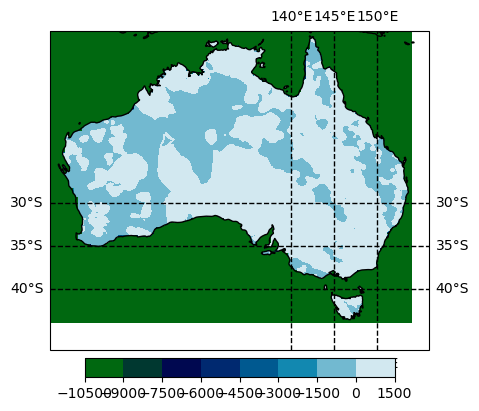

35   0


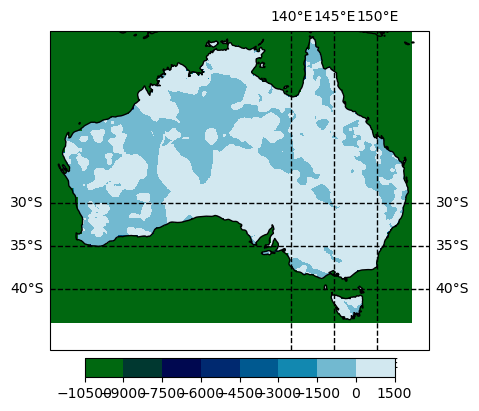

36   0


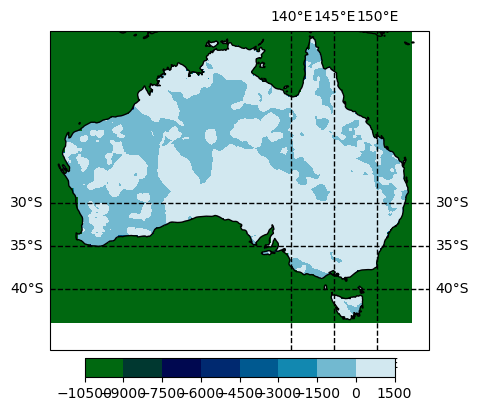

37   0


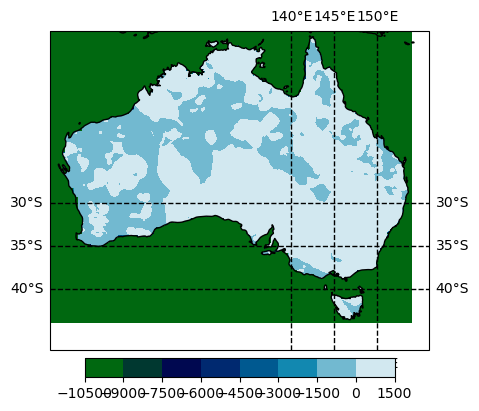

38   0


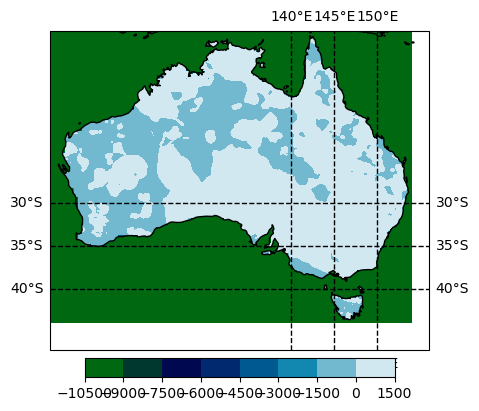

39   0


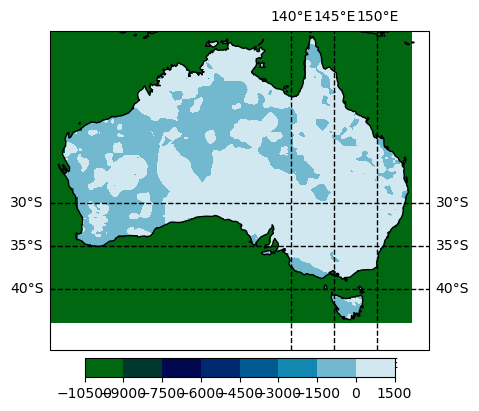

In [20]:
for i in np.arange(ts_s, 40):

    # spi_tmp  = np.where(landsea == 1, -9999., spi[i,:,:].data)

    spi_tmp  = spi[i,:,:].data

    # if np.sum(np.isnan(spi_tmp)) > 100:
    print(i,' ', np.sum(np.isnan(spi_tmp)))

    # Create a figure with 3 subplots in 1 row
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), subplot_kw={'projection': ccrs.PlateCarree()})

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.3)

    # Set extent based on loc_lat and loc_lon
    ax.set_extent([112, 156, -45, -10])  # Example extent, adjust as needed

    ax.coastlines(resolution="50m", linewidth=1)

    # Add gridlines
    gl               = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
    gl.xlabels_top   = False
    gl.ylabels_right = False
    gl.xlines        = True

    gl.xlocator      = mticker.FixedLocator([140, 145, 150])
    gl.ylocator      = mticker.FixedLocator([-40, -35, -30])

    gl.xformatter    = LongitudeFormatter()
    gl.yformatter    = LatitudeFormatter()
    gl.xlabel_style  = {'size': 10, 'color': 'black'}
    gl.ylabel_style  = {'size': 10, 'color': 'black'}

    # clevs            = [-5,-4,-3,-2,-1,-0.5,0.5,1,2,3,4,5]
    plot1            = ax.contourf(lon_mask, lat_mask, spi_tmp,  transform=ccrs.PlateCarree(), cmap=plt.cm.ocean) # extend='both', levels=clevs,

    cb = plt.colorbar(plot1, ax=ax, orientation="horizontal", pad=0.02, aspect=16, shrink=0.8)
    cb.ax.tick_params(labelsize=10)

    plt.show()
    # plt.savefig('./plots/spatial_map_obs_'+message+'.png',dpi=300)


### 从第一个负值开始积累，直到第一个正值出现，这个时期长于10或者30天，就认为是想要关注的干旱，按到底有多少天spi—90小于-1，将干旱分类，画出相对应的

## Check drought periods

In [ ]:
input_file = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_90_reorder_drought_periods_2000-2023.nc'
mask_file  = '/g/data/w97/mm3972/model/cable/src/CABLE-AUX/offline/mmy_gridinfo_AU/gridinfo_AWAP_OpenLandMap_DLCM_mask.nc'

with nc.Dataset(input_file, mode='r') as f_in:

    lat_out          = f_in.variables['lat'][:]
    lon_out          = f_in.variables['lon'][:]
    accumulated_days = f_in.variables['accumulated_days'][:,:,:]
    time             = nc.num2date(f_in.variables['time'][:],f_in.variables['time'].units,
                         only_use_cftime_datetimes=False,only_use_python_datetimes=True)
    ntime            = len(time)

with nc.Dataset(mask_file, mode='r') as f_mask:

    lat_in           = f_mask.variables['latitude'][:]
    lon_in           = f_mask.variables['longitude'][:]
    landsea          = f_mask.variables['landsea'][:,:]
    
landsea_regrid   = regrid_data(lat_in, lon_in, lat_out, lon_out, landsea, method='nearest')
landsea_3d       = np.repeat(landsea_regrid[np.newaxis, :, :], ntime, axis=0)
accumulated_days = np.where(landsea_3d==0, accumulated_days, np.nan)

In [ ]:
# Get total number of non-NaN pixels
total_pixel = np.sum(~np.isnan(accumulated_days[0, :, :]))

# Loop over time steps
for i in np.arange(ntime):

    # Count drought pixels (where condition is met)
    drought_pixel   = np.sum(accumulated_days[i, :, :] >= 1)
    drought_percent = drought_pixel / total_pixel * 100.0
    
    
    # Only plot when drought_percent exceeds 5%
    if drought_percent > 10:
        print(drought_pixel)
        print(drought_percent)

        # ================== Start Plotting =================
        fig = plt.figure(figsize=(6, 5))
        ax = plt.axes(projection=ccrs.PlateCarree())

        # Set map extent
        ax.set_extent([112, 154, -45, -5])
        ax.coastlines(resolution="50m", linewidth=1)

        # Add gridlines
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
        gl.top_labels = False
        gl.right_labels = False
        gl.xlines = True
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 10, 'color': 'black'}
        gl.ylabel_style = {'size': 10, 'color': 'black'}

        # Define color map and levels for contour
        cmap = plt.cm.BrBG
        levels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

        # Create meshgrid of longitude and latitude
        lons, lats = np.meshgrid(lon_out, lat_out)

        # Contour plot
        plot = ax.contourf(lons, lats, accumulated_days[i, :, :], levels=levels, transform=ccrs.PlateCarree(), cmap=cmap)

        # Add colorbar
        cb = plt.colorbar(plot, ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)

        # Save the figure
        fig.savefig(f"./plots/drought_events/drought_events_{time[i]}.png", bbox_inches='tight', dpi=300)

        # Close the figure to avoid memory issues
        plt.close(fig)

## Identify drought area

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label, sum as nd_sum
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def keep_only_large_drought_region(i, time, accumulated_day, precip_day, lat, lon, min_drought_area_km2=10000):
    
    # Define the drought threshold
    drought_binary = accumulated_day > 0

    # Label connected regions in the binary drought mask
    labeled_droughts, num_features = label(drought_binary)

    # Calculate grid cell size (resolution) based on lat/lon coordinates
    lat_resolution = abs(lat[1] - lat[0])  # Latitude resolution in degrees
    lon_resolution = abs(lon[1] - lon[0])  # Longitude resolution in degrees

    # Approximate cell area in km^2
    earth_radius_km = 6371.0
    cell_area_km2 = (
        (lat_resolution * np.pi / 180) *
        (lon_resolution * np.pi / 180) *
        (earth_radius_km ** 2) )

    # Calculate area in km^2 for each labeled region
    drought_areas     = nd_sum(drought_binary, labeled_droughts, index=range(1, num_features + 1))
    drought_areas_km2 = drought_areas * cell_area_km2

    # Filter regions that meet the minimum area threshold
    large_drought_labels = [i + 1 for i, area in enumerate(drought_areas_km2) if area >= min_drought_area_km2]
    large_drought_map    = np.isin(labeled_droughts, large_drought_labels)
    
    accumulated_day_large_drought = np.where(~np.isnan(large_drought_map), accumulated_day, np.nan)
    
    if large_drought_labels != None:
        
        print(f'{time} has drought area > {min_drought_area_km2} km²')
        
        # ================== Start Plotting =================
        fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(9, 6), subplot_kw={'projection': ccrs.PlateCarree()})

        # Set map extent for specific region
        ax.set_extent([112, 154, -43, -9])
        ax.coastlines(resolution="50m", linewidth=1)

        # # Add gridlines and format them
        # gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
        # gl.top_labels = False
        # gl.right_labels = False
        # gl.xformatter = LONGITUDE_FORMATTER
        # gl.yformatter = LATITUDE_FORMATTER
        # gl.xlabel_style = {'size': 10, 'color': 'black'}
        # gl.ylabel_style = {'size': 10, 'color': 'black'}

        # Plot the original accumulated day data
        accumulated_day               = np.where(accumulated_day<0, np.nan, accumulated_day)
        accumulated_day_large_drought = np.where(accumulated_day_large_drought<0, np.nan, accumulated_day_large_drought)
        im1                           = axs[0].imshow(accumulated_day_large_drought[:, :], vmin=0, vmax=200, cmap='hot_r', extent=[lon.min(), lon.max(), lat.min(), lat.max()])
        cbar1                         = plt.colorbar(im1, ax=axs[0], orientation="horizontal", pad=0.02, aspect=20, shrink=0.7)
        cbar1.set_label('Accumulated Days in Drought')
        
        precip_day                    = np.where(precip_day<0.0001, np.nan, precip_day)
        im2                           = axs[1].imshow(precip_day[:, :], vmin=0, vmax=20, cmap='YlGnBu', extent=[lon.min(), lon.max(), lat.min(), lat.max()])
        cbar2                         = plt.colorbar(im2, ax=axs[1], orientation="horizontal", pad=0.02, aspect=20, shrink=0.7)
        cbar2.set_label('Daily rainfall')
        
        # # Overlay large drought regions in grayscale with transparency
        # plot            = ax.imshow(large_drought_map[:, :], cmap='gray', alpha=0.3, extent=[lon.min(), lon.max(), lat.min(), lat.max()])

        # Set plot title
        plt.title(f'{time} with drought area > {min_drought_area_km2} km²')

        # Save the figure
        fig.savefig(f"/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/plots/drought_events/{time.year}/drought_events_{time}.png", bbox_inches='tight', dpi=300)

        plt.show()

        # Close the figure to avoid memory issues
        # plt.close(fig)
    
    large_drought_labels= None
    large_drought_map   = None
    precip_day          = None
    
    return 


In [ ]:
input_file = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/spi_pearson_90_reorder_nan_filled_drought_periods.nc'
mask_file  = '/g/data/w97/mm3972/model/cable/src/CABLE-AUX/offline/mmy_gridinfo_AU/gridinfo_AWAP_OpenLandMap_DLCM_mask.nc'
rain_file  = '/g/data/w97/mm3972/scripts/Land_Drought_Rainfall/identify_drought_break_events/nc_files/agcd_v1_precip_total_r005_daily_1950_2023.nc'

with nc.Dataset(input_file, mode='r') as f_in:
    lat_out          = f_in.variables['lat'][:]
    lon_out          = f_in.variables['lon'][:]
    accumulated_days = f_in.variables['accumulated_days'][:,:,:]
    time             = nc.num2date(f_in.variables['time'][:],f_in.variables['time'].units,
                         only_use_cftime_datetimes=False,only_use_python_datetimes=True)
    ntime            = len(time)
    
with nc.Dataset(rain_file, mode='r') as f_rain:
    lat_rain         = f_rain.variables['lat'][10:]
    lon_rain         = f_rain.variables['lon'][:-45]
    precip           = f_rain.variables['precip'][:,10:,:-45]
    time_rain        = nc.num2date(f_rain.variables['time'][:],f_rain.variables['time'].units,
                         only_use_cftime_datetimes=False,only_use_python_datetimes=True)
    ntime_rain       = len(time)

with nc.Dataset(mask_file, mode='r') as f_mask:
    landsea          = f_mask.variables['landsea'][:,:]
    
landsea_3d           = np.repeat(landsea[np.newaxis, :, :], ntime, axis=0)
accumulated_days     = np.where(landsea_3d==0, accumulated_days, np.nan)
precip               = np.where(landsea_3d==0, precip, np.nan)

# Define minimum drought area in square kilometers (example threshold)
# min_drought_area_km2 = 10000  # Minimum size in square km


In [ ]:
# for i in np.arange(ntime):
min_drought_area_km2 = 10000  # Minimum size in square km
for i in np.arange(25500, 25510):
    accumulated_day = accumulated_days[i,::-1,:]
    precip_day      = precip[i,::-1,:]
    keep_only_large_drought_region(i, time[i], accumulated_day, precip_day, lat_out, lon_out, min_drought_area_km2=min_drought_area_km2)

### Check weather system of drought-breaking rainfall

In [ ]:
file_era5_path = '/g/data/rt52'
